在这份文件中采用的全部都是 ECS Spherical

第一行个是 16 维 第二个是 32 维

没有做截断

这个文件也包含了 LINE 的高维图 跟前面一样

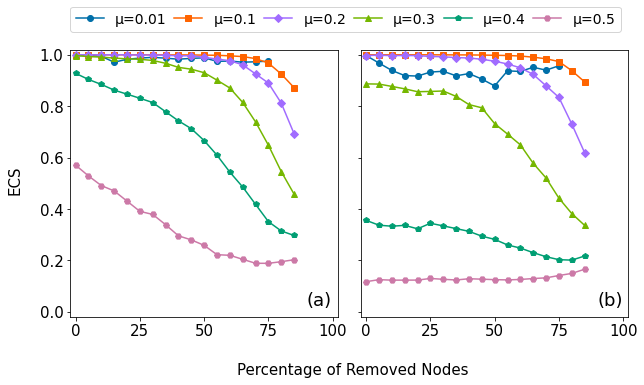

In [1]:
import os

import pandas as pd

def load_data(disturb_type: int, N, dim, method):
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    MEAN = {}
    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    for mu in MU:
        if disturb_type==1:
            folder_name = f"Stoch_{N}_{methods[method-1]}"
            file_name = f"Stoch_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==2:
            folder_name = f"Btwn_{N}_{methods[method-1]}"   
            file_name = f"Btwn_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==3:
            folder_name = f"Trans_{N}_{methods[method-1]}"   
            file_name = f"Trans_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"            
        elif disturb_type==4:
            folder_name = f"Deg_{N}_{methods[method-1]}"   
            file_name = f"Deg_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==5:
            folder_name = f"Rank_{N}_{methods[method-1]}"   
            file_name = f"Rank_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==6:
            folder_name = f"Trank_{N}_{methods[method-1]}"   
            file_name = f"Trank_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"            
        file_path = os.path.join(folder_name, file_name)
        
        MEAN[mu] = pd.read_csv(file_path, header=None, sep=' ')
        
    return MEAN


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def format_percentage(x, pos):
    return f'{int(x * 100)}'

def Plot_ECS(disturb_type:int, N, method):
    MEAN16 = load_data(disturb_type=disturb_type, N=N, dim=16, method=method)
    MEAN32 = load_data(disturb_type=disturb_type, N=N, dim=32, method=method)

    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    labels = {0.01: 'μ=0.01', 0.1: 'μ=0.1', 0.2: 'μ=0.2', 0.3: 'μ=0.3', 0.4: 'μ=0.4', 0.5: 'μ=0.5'}
    
    # Define a marker dictionary to map mu values to marker styles
    markers = {0.01: 'o', 0.1: 's', 0.2: 'D', 0.3: '^', 0.4: 'p', 0.5: 'H'}
    
    # Color Universal Design (CUD) palette
    cud_palette = {
        0.01: '#006FA9',  # Blue
        0.1: '#FF6400',    # Orange
        0.2: '#A16CFF',    # Purple
        0.3: '#75B700',    # Lime green
        0.4: '#009E73',    # Green
        0.6: '#93003A',    # Maroon
        0.5: '#CC79A7',    # Magenta
    }
    
    
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 10))

    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    
    for mu in MU:
        x_MEAN16_0 = np.arange(0, len(MEAN16[mu][3])) * 0.05
        x_MEAN32_0 = np.arange(0, len(MEAN32[mu][3])) * 0.05
        
        axes[0].plot(x_MEAN16_0, MEAN16[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[1].plot(x_MEAN32_0, MEAN32[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        
    for ax in axes.flatten():
        ax.set_aspect('equal')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100)}'))


    plt.subplots_adjust(wspace=0, hspace=0)

    fig.text(0.485, 0.325, '(a)', fontsize=18)
    fig.text(0.89, 0.325, '(b)', fontsize=18)

    fig.text(0.55, 0.229, 'Percentage of Removed Nodes', ha='center', fontsize=15)
    fig.text(0.07, 0.5, 'ECS', va='center', rotation='vertical', fontsize=15)

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        
    handles, labels = axes[0].get_legend_handles_labels()

    fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=14, bbox_to_anchor=(0.54, 0.75), columnspacing=0.55)

    plt.tight_layout(rect=[0.1, 0.01, 0.96, 0.98])

    if disturb_type==1:
        file_name = f"Stoch_{N}_{methods[method-1]}_ECS.png"
    elif disturb_type==2:
        file_name = f"Btwn_{N}_{methods[method-1]}_ECS.png"
    elif disturb_type==3:
        file_name = f"Trans_{N}_{methods[method-1]}_ECS.png"        
    elif disturb_type==4:
        file_name = f"Deg_{N}_{methods[method-1]}_ECS.png"
    elif disturb_type==5:
        file_name = f"Rank_{N}_{methods[method-1]}_ECS.png"  
    elif disturb_type==6:
        file_name = f"Trank_{N}_{methods[method-1]}_ECS.png"        
    plt.savefig(file_name,bbox_inches='tight')    
    
    plt.show()

    
disturb_type = 1
N = 1000
method = 4
Plot_ECS(disturb_type=disturb_type, N=N, method=method)

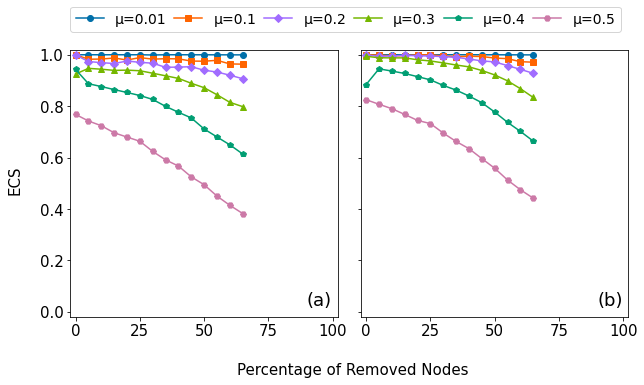

In [11]:
disturb_type = 1
N = 10000
method = 7
Plot_ECS(disturb_type=disturb_type, N=N, method=method)

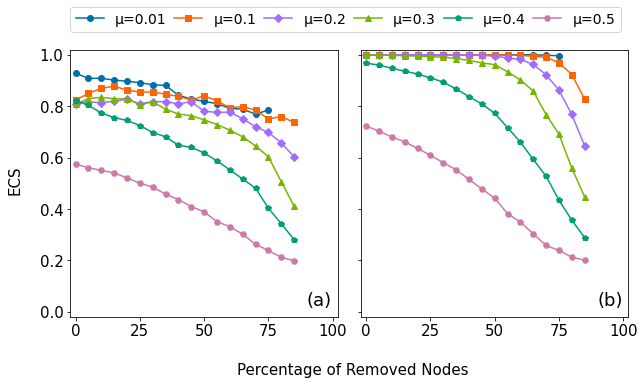

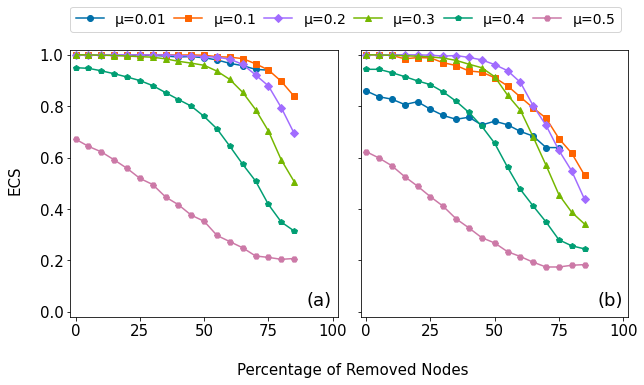

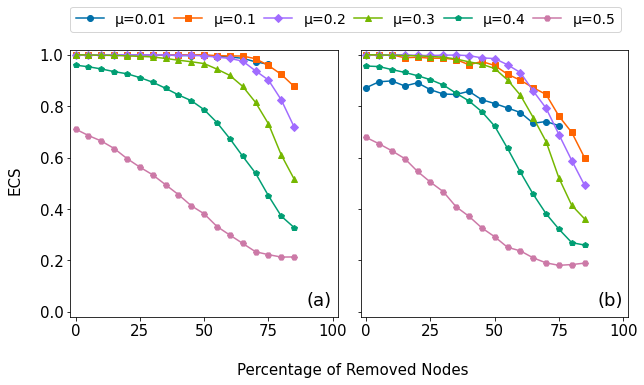

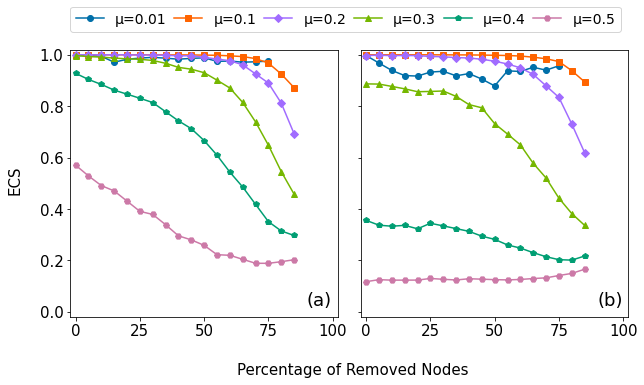

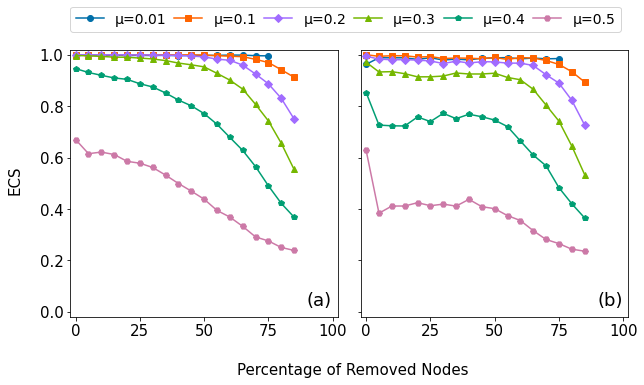

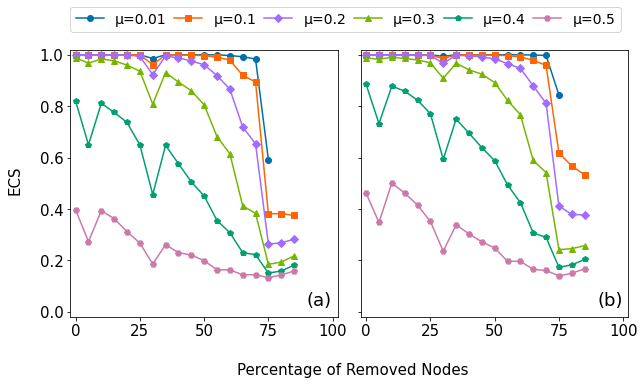

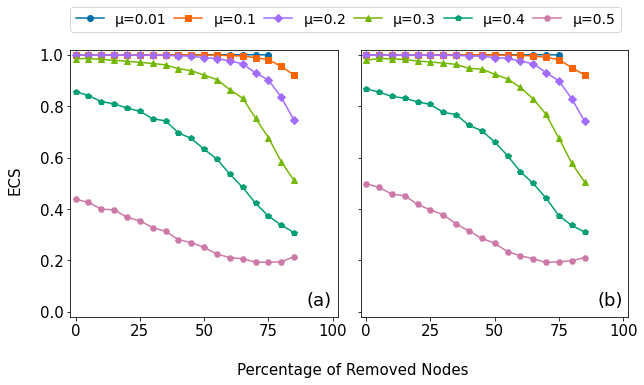

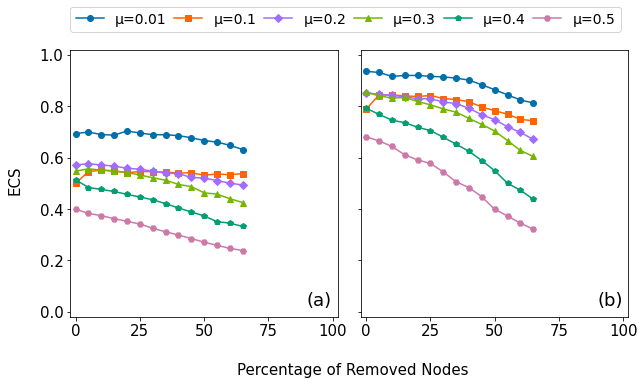

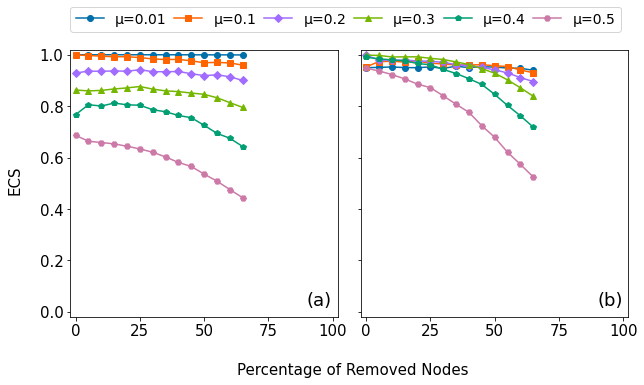

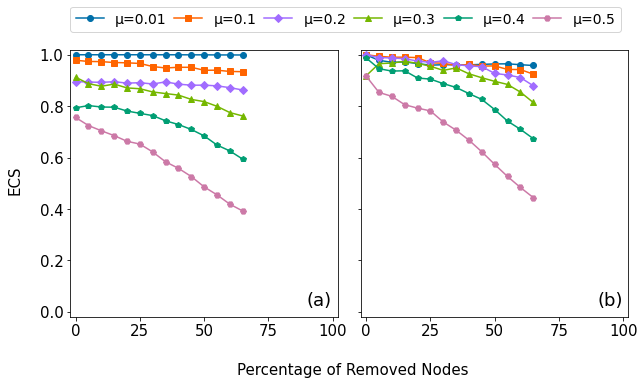

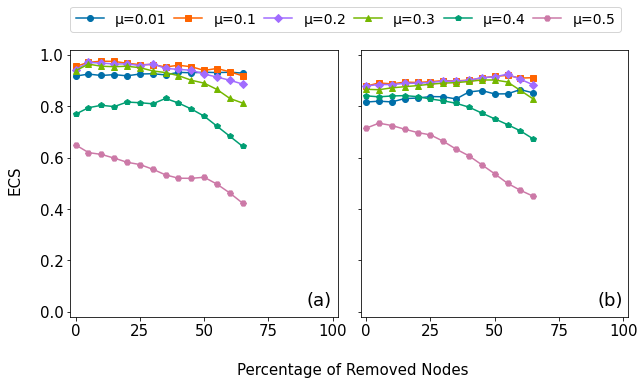

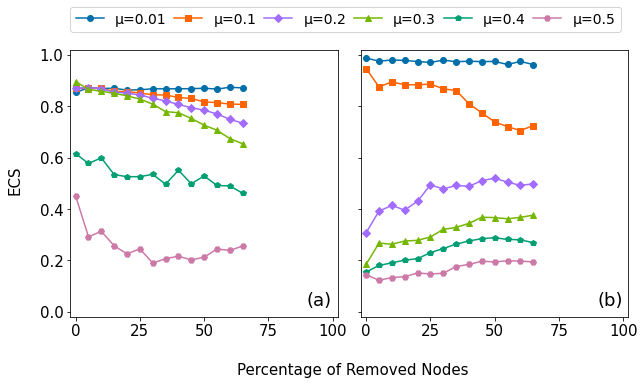

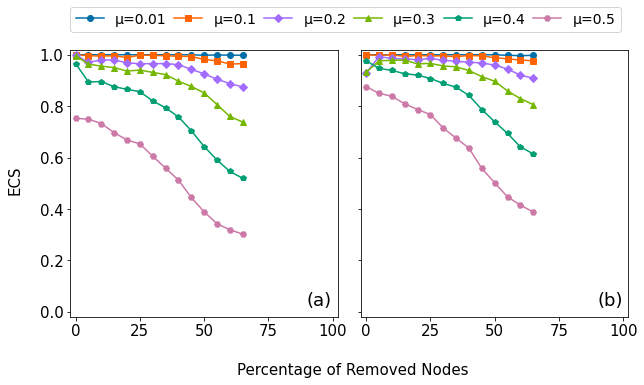

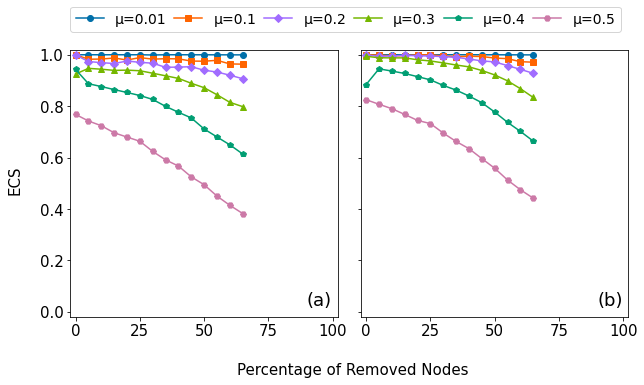

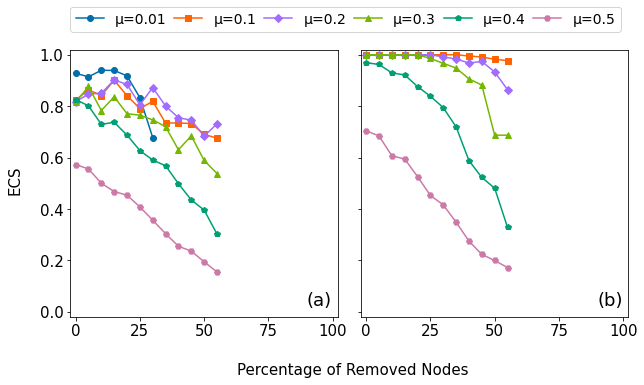

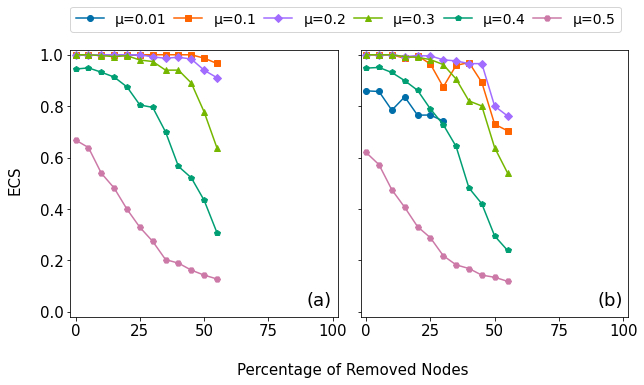

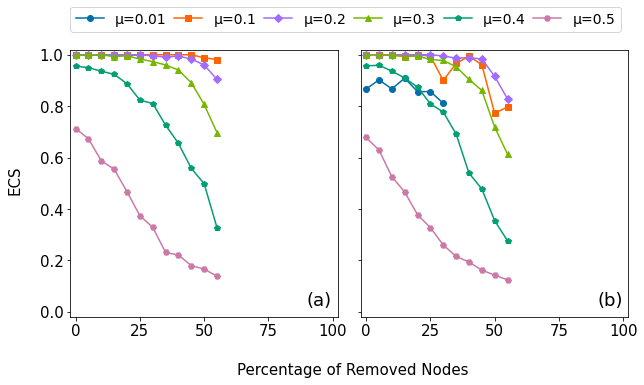

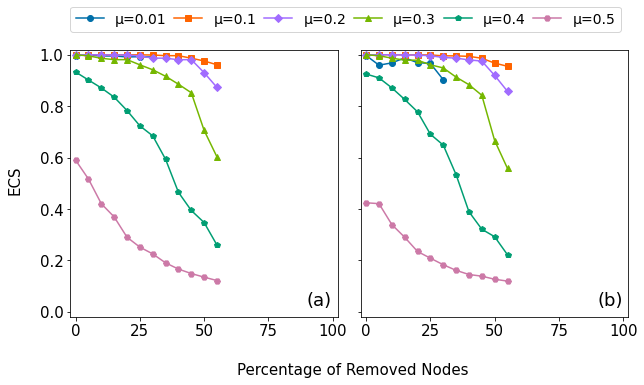

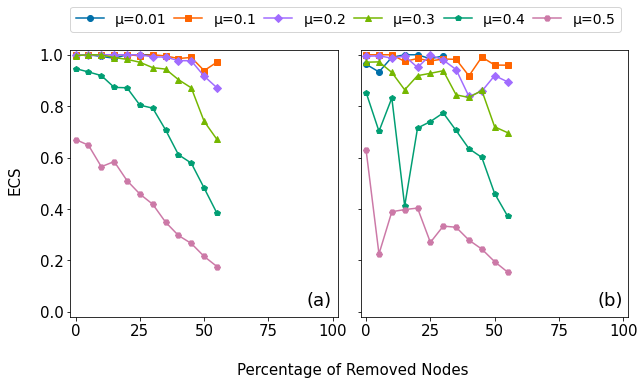

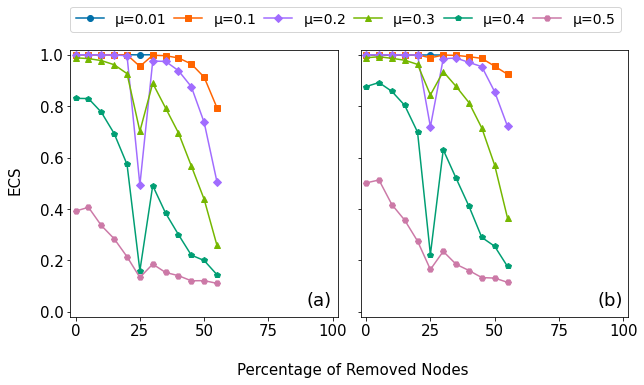

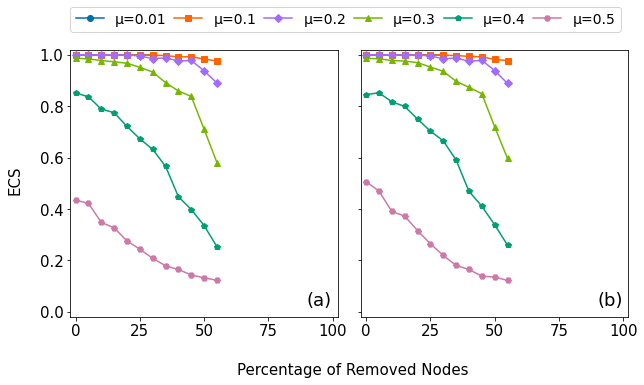

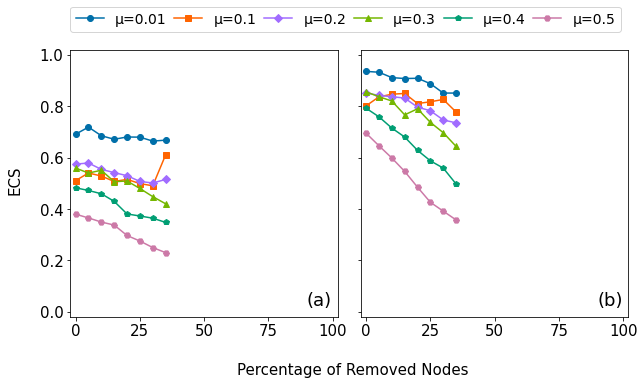

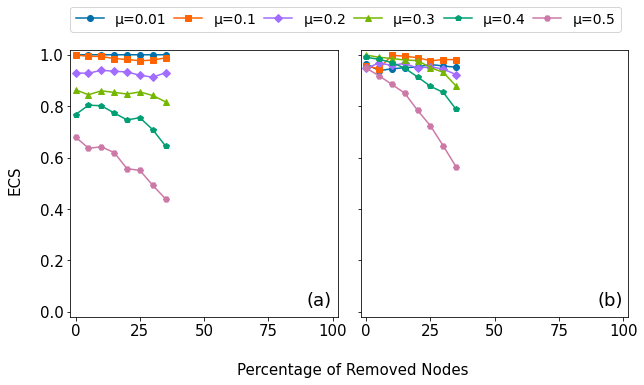

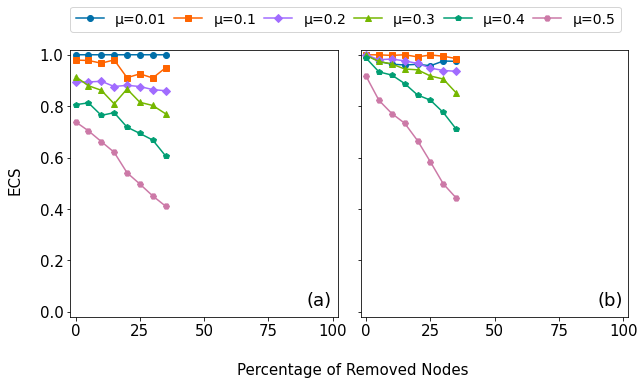

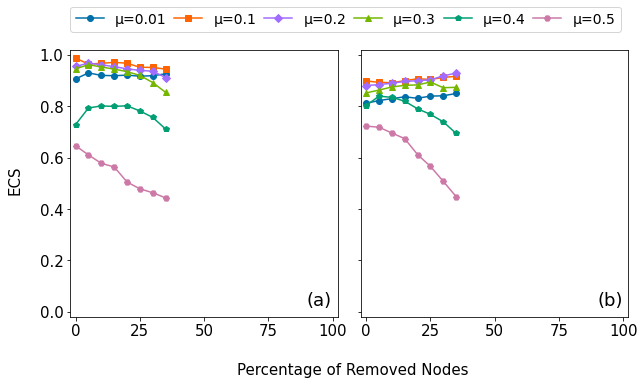

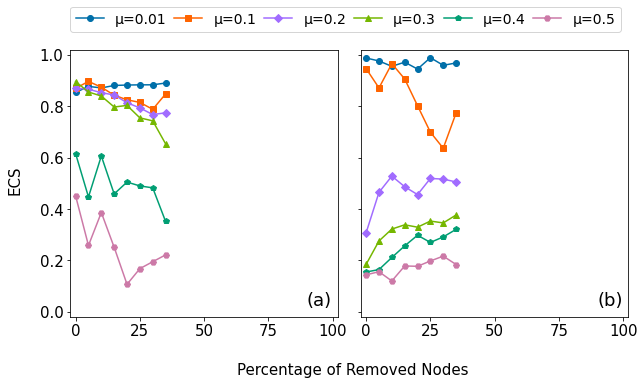

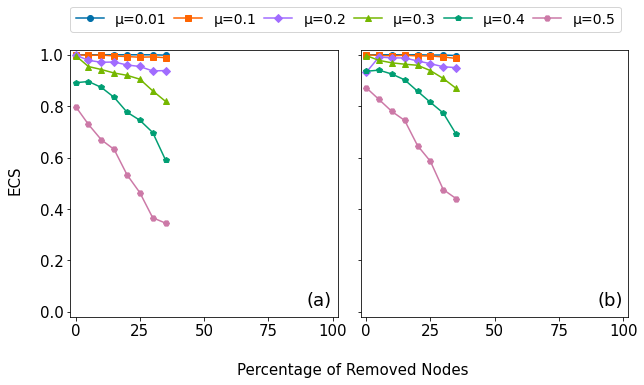

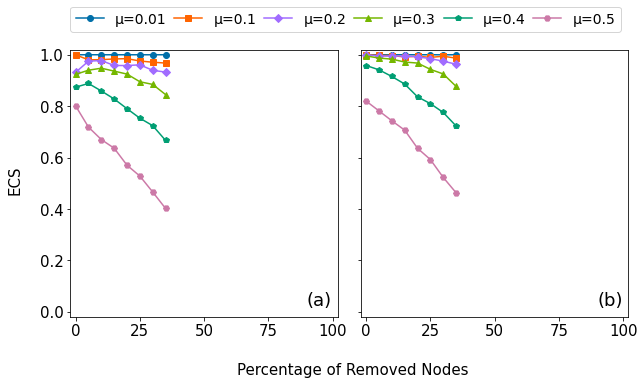

In [3]:
for disturb_type in [1, 5]:
    for N in [1000, 10000]:
        for method in range(1, 8):
            Plot_ECS(disturb_type=disturb_type, N=N, method=method)

In [4]:
def Plot_ECS_line_high(disturb_type:int, N, method):
    MEAN16 = load_data(disturb_type=disturb_type, N=N, dim=128, method=method)
    MEAN32 = load_data(disturb_type=disturb_type, N=N, dim=256, method=method)

    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    labels = {0.01: 'μ=0.01', 0.1: 'μ=0.1', 0.2: 'μ=0.2', 0.3: 'μ=0.3', 0.4: 'μ=0.4', 0.5: 'μ=0.5'}
    
    # Define a marker dictionary to map mu values to marker styles
    markers = {0.01: 'o', 0.1: 's', 0.2: 'D', 0.3: '^', 0.4: 'p', 0.5: 'H'}
    
    # Color Universal Design (CUD) palette
    cud_palette = {
        0.01: '#006FA9',  # Blue
        0.1: '#FF6400',    # Orange
        0.2: '#A16CFF',    # Purple
        0.3: '#75B700',    # Lime green
        0.4: '#009E73',    # Green
        0.6: '#93003A',    # Maroon
        0.5: '#CC79A7',    # Magenta
    }
    
    
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))

    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    
    for mu in MU:
        x_MEAN16_0 = np.arange(0, len(MEAN16[mu][2])) * 0.05
        x_MEAN16_1 = np.arange(0, len(MEAN16[mu][3])) * 0.05
        x_MEAN32_0 = np.arange(0, len(MEAN32[mu][2])) * 0.05
        x_MEAN32_1 = np.arange(0, len(MEAN32[mu][3])) * 0.05
        
        axes[0, 0].plot(x_MEAN16_0, MEAN16[mu][2], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[0, 1].plot(x_MEAN16_1, MEAN16[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[1, 0].plot(x_MEAN32_0, MEAN32[mu][2], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[1, 1].plot(x_MEAN32_1, MEAN32[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        
    for ax in axes.flatten():
        ax.set_aspect('equal')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100)}'))


    plt.subplots_adjust(wspace=0, hspace=0)

    fig.text(0.46, 0.55, '(a)', fontsize=18)
    fig.text(0.91, 0.55, '(b)', fontsize=18)
    fig.text(0.46, 0.15, '(c)', fontsize=18)
    fig.text(0.91, 0.15, '(d)', fontsize=18)

    fig.text(0.55, 0.05, 'Percentage of Removed Nodes', ha='center', fontsize=15)
    fig.text(0.03, 0.525, 'ECS', va='center', rotation='vertical', fontsize=15)

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        
    handles, labels = axes[0, 0].get_legend_handles_labels()

    fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=14, bbox_to_anchor=(0.54, 0.98), columnspacing=0.55)

    plt.tight_layout(rect=[0.05, 0.08, 1, 0.93])

    if disturb_type==1:
        file_name = f"Stoch_{N}_{methods[method-1]}_ECS_line_high.png"
    elif disturb_type==2:
        file_name = f"Btwn_{N}_{methods[method-1]}_ECS_line_high.png"
    elif disturb_type==3:
        file_name = f"Trans_{N}_{methods[method-1]}_ECS_line_high.png"        
    elif disturb_type==4:
        file_name = f"Deg_{N}_{methods[method-1]}_ECS_line_high.png"
    elif disturb_type==5:
        file_name = f"Rank_{N}_{methods[method-1]}_ECS_line_high.png"  
    elif disturb_type==6:
        file_name = f"Trank_{N}_{methods[method-1]}_ECS_line_high.png"        
    plt.savefig(file_name)    
    
    plt.show()

In [5]:
import os

import pandas as pd

def load_data(disturb_type: int, N, dim, method):
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    MEAN = {}
    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    for mu in MU:
        if disturb_type==1:
            folder_name = f"Stoch_{N}_{methods[method-1]}"
            file_name = f"Stoch_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==2:
            folder_name = f"Btwn_{N}_{methods[method-1]}"   
            file_name = f"Btwn_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==3:
            folder_name = f"Trans_{N}_{methods[method-1]}"   
            file_name = f"Trans_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"            
        elif disturb_type==4:
            folder_name = f"Deg_{N}_{methods[method-1]}"   
            file_name = f"Deg_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==5:
            folder_name = f"Rank_{N}_{methods[method-1]}"   
            file_name = f"Rank_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==6:
            folder_name = f"Trank_{N}_{methods[method-1]}"   
            file_name = f"Trank_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"            
        file_path = os.path.join(folder_name, file_name)
        
        MEAN[mu] = pd.read_csv(file_path, header=None, sep=' ')
        
    return MEAN


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def format_percentage(x, pos):
    return f'{int(x * 100)}'

def Plot_ECS_line_high(disturb_type:int, N, method):
    MEAN16 = load_data(disturb_type=disturb_type, N=N, dim=128, method=method)
    MEAN32 = load_data(disturb_type=disturb_type, N=N, dim=256, method=method)

    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    labels = {0.01: 'μ=0.01', 0.1: 'μ=0.1', 0.2: 'μ=0.2', 0.3: 'μ=0.3', 0.4: 'μ=0.4', 0.5: 'μ=0.5'}
    
    # Define a marker dictionary to map mu values to marker styles
    markers = {0.01: 'o', 0.1: 's', 0.2: 'D', 0.3: '^', 0.4: 'p', 0.5: 'H'}
    
    # Color Universal Design (CUD) palette
    cud_palette = {
        0.01: '#006FA9',  # Blue
        0.1: '#FF6400',    # Orange
        0.2: '#A16CFF',    # Purple
        0.3: '#75B700',    # Lime green
        0.4: '#009E73',    # Green
        0.6: '#93003A',    # Maroon
        0.5: '#CC79A7',    # Magenta
    }
    
    
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 10))

    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    
    for mu in MU:
        x_MEAN16_0 = np.arange(0, len(MEAN16[mu][3])) * 0.05
        x_MEAN32_0 = np.arange(0, len(MEAN32[mu][3])) * 0.05
        
        axes[0].plot(x_MEAN16_0, MEAN16[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[1].plot(x_MEAN32_0, MEAN32[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        
    for ax in axes.flatten():
        ax.set_aspect('equal')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100)}'))


    plt.subplots_adjust(wspace=0, hspace=0)

    fig.text(0.485, 0.325, '(a)', fontsize=18)
    fig.text(0.89, 0.325, '(b)', fontsize=18)

    fig.text(0.55, 0.229, 'Percentage of Removed Nodes', ha='center', fontsize=15)
    fig.text(0.07, 0.5, 'ECS', va='center', rotation='vertical', fontsize=15)

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        
    handles, labels = axes[0].get_legend_handles_labels()

    fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=14, bbox_to_anchor=(0.54, 0.75), columnspacing=0.55)

    plt.tight_layout(rect=[0.1, 0.01, 0.96, 0.98])

    if disturb_type==1:
        file_name = f"Stoch_{N}_{methods[method-1]}_ECS_line_high.png"
    elif disturb_type==2:
        file_name = f"Btwn_{N}_{methods[method-1]}_ECS_line_high.png"
    elif disturb_type==3:
        file_name = f"Trans_{N}_{methods[method-1]}_ECS_line_high.png"        
    elif disturb_type==4:
        file_name = f"Deg_{N}_{methods[method-1]}_ECS_line_high.png"
    elif disturb_type==5:
        file_name = f"Rank_{N}_{methods[method-1]}_ECS_line_high.png"  
    elif disturb_type==6:
        file_name = f"Trank_{N}_{methods[method-1]}_ECS_line_high.png"        
    plt.savefig(file_name,bbox_inches='tight')       
    
    plt.show()

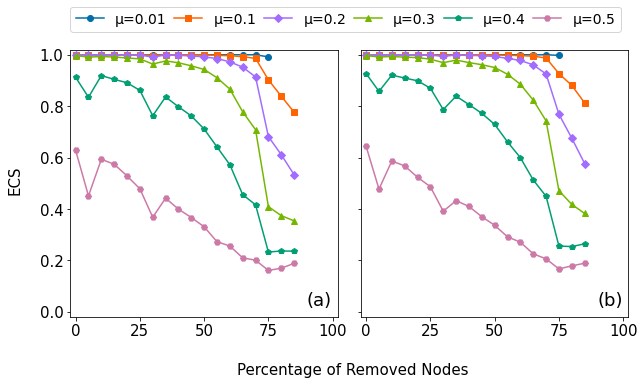

In [6]:
disturb_type = 1
N = 1000
method = 6
Plot_ECS_line_high(disturb_type=disturb_type, N=N, method=method)

In [7]:
def Plot_ECS_mnmf_high(disturb_type:int, N, method):
    MEAN16 = load_data(disturb_type=disturb_type, N=N, dim=128, method=method)
    MEAN32 = load_data(disturb_type=disturb_type, N=N, dim=256, method=method)

    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    labels = {0.01: 'μ=0.01', 0.1: 'μ=0.1', 0.2: 'μ=0.2', 0.3: 'μ=0.3', 0.4: 'μ=0.4', 0.5: 'μ=0.5'}
    
    # Define a marker dictionary to map mu values to marker styles
    markers = {0.01: 'o', 0.1: 's', 0.2: 'D', 0.3: '^', 0.4: 'p', 0.5: 'H'}
    
    # Color Universal Design (CUD) palette
    cud_palette = {
        0.01: '#006FA9',  # Blue
        0.1: '#FF6400',    # Orange
        0.2: '#A16CFF',    # Purple
        0.3: '#75B700',    # Lime green
        0.4: '#009E73',    # Green
        0.6: '#93003A',    # Maroon
        0.5: '#CC79A7',    # Magenta
    }
    
    
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))

    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    
    for mu in MU:
        x_MEAN16_0 = np.arange(0, len(MEAN16[mu][2])) * 0.05
        x_MEAN16_1 = np.arange(0, len(MEAN16[mu][3])) * 0.05
        x_MEAN32_0 = np.arange(0, len(MEAN32[mu][2])) * 0.05
        x_MEAN32_1 = np.arange(0, len(MEAN32[mu][3])) * 0.05
        
        axes[0, 0].plot(x_MEAN16_0, MEAN16[mu][2], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[0, 1].plot(x_MEAN16_1, MEAN16[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[1, 0].plot(x_MEAN32_0, MEAN32[mu][2], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[1, 1].plot(x_MEAN32_1, MEAN32[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        
    for ax in axes.flatten():
        ax.set_aspect('equal')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100)}'))


    plt.subplots_adjust(wspace=0, hspace=0)

    fig.text(0.46, 0.55, '(a)', fontsize=18)
    fig.text(0.91, 0.55, '(b)', fontsize=18)
    fig.text(0.46, 0.15, '(c)', fontsize=18)
    fig.text(0.91, 0.15, '(d)', fontsize=18)

    fig.text(0.55, 0.05, 'Percentage of Removed Nodes', ha='center', fontsize=15)
    fig.text(0.03, 0.525, 'ECS', va='center', rotation='vertical', fontsize=15)

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        
    handles, labels = axes[0, 0].get_legend_handles_labels()

    fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=14, bbox_to_anchor=(0.54, 0.98), columnspacing=0.55)

    plt.tight_layout(rect=[0.05, 0.08, 1, 0.93])

    if disturb_type==1:
        file_name = f"Stoch_{N}_{methods[method-1]}_ECS_mnmf_high.png"
    elif disturb_type==2:
        file_name = f"Btwn_{N}_{methods[method-1]}_ECS_mnmf_high.png"
    elif disturb_type==3:
        file_name = f"Trans_{N}_{methods[method-1]}_ECS_mnmf_high.png"        
    elif disturb_type==4:
        file_name = f"Deg_{N}_{methods[method-1]}_ECS_mnmf_high.png"
    elif disturb_type==5:
        file_name = f"Rank_{N}_{methods[method-1]}_ECS_mnmf_high.png"  
    elif disturb_type==6:
        file_name = f"Trank_{N}_{methods[method-1]}_ECS_mnmf_high.png"        
    plt.savefig(file_name)    
    
    plt.show()

In [8]:
import os

import pandas as pd

def load_data(disturb_type: int, N, dim, method):
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    MEAN = {}
    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    for mu in MU:
        if disturb_type==1:
            folder_name = f"Stoch_{N}_{methods[method-1]}"
            file_name = f"Stoch_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==2:
            folder_name = f"Btwn_{N}_{methods[method-1]}"   
            file_name = f"Btwn_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==3:
            folder_name = f"Trans_{N}_{methods[method-1]}"   
            file_name = f"Trans_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"            
        elif disturb_type==4:
            folder_name = f"Deg_{N}_{methods[method-1]}"   
            file_name = f"Deg_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==5:
            folder_name = f"Rank_{N}_{methods[method-1]}"   
            file_name = f"Rank_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==6:
            folder_name = f"Trank_{N}_{methods[method-1]}"   
            file_name = f"Trank_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"            
        file_path = os.path.join(folder_name, file_name)
        
        MEAN[mu] = pd.read_csv(file_path, header=None, sep=' ')
        
    return MEAN


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def format_percentage(x, pos):
    return f'{int(x * 100)}'

def Plot_ECS_mnmf_high(disturb_type:int, N, method):
    MEAN16 = load_data(disturb_type=disturb_type, N=N, dim=128, method=method)
    MEAN32 = load_data(disturb_type=disturb_type, N=N, dim=256, method=method)

    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    labels = {0.01: 'μ=0.01', 0.1: 'μ=0.1', 0.2: 'μ=0.2', 0.3: 'μ=0.3', 0.4: 'μ=0.4', 0.5: 'μ=0.5'}
    
    # Define a marker dictionary to map mu values to marker styles
    markers = {0.01: 'o', 0.1: 's', 0.2: 'D', 0.3: '^', 0.4: 'p', 0.5: 'H'}
    
    # Color Universal Design (CUD) palette
    cud_palette = {
        0.01: '#006FA9',  # Blue
        0.1: '#FF6400',    # Orange
        0.2: '#A16CFF',    # Purple
        0.3: '#75B700',    # Lime green
        0.4: '#009E73',    # Green
        0.6: '#93003A',    # Maroon
        0.5: '#CC79A7',    # Magenta
    }
    
    
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 10))

    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    
    for mu in MU:
        x_MEAN16_0 = np.arange(0, len(MEAN16[mu][3])) * 0.05
        x_MEAN32_0 = np.arange(0, len(MEAN32[mu][3])) * 0.05
        
        axes[0].plot(x_MEAN16_0, MEAN16[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        axes[1].plot(x_MEAN32_0, MEAN32[mu][3], label=labels[mu], color=cud_palette[mu], marker=markers[mu])
        
    for ax in axes.flatten():
        ax.set_aspect('equal')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100)}'))


    plt.subplots_adjust(wspace=0, hspace=0)

    fig.text(0.485, 0.325, '(a)', fontsize=18)
    fig.text(0.89, 0.325, '(b)', fontsize=18)

    fig.text(0.55, 0.229, 'Percentage of Removed Nodes', ha='center', fontsize=15)
    fig.text(0.07, 0.5, 'ECS', va='center', rotation='vertical', fontsize=15)

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        
    handles, labels = axes[0].get_legend_handles_labels()

    fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=14, bbox_to_anchor=(0.54, 0.75), columnspacing=0.55)

    plt.tight_layout(rect=[0.1, 0.01, 0.96, 0.98])

    if disturb_type==1:
        file_name = f"Stoch_{N}_{methods[method-1]}_ECS_mnmf_high.png"
    elif disturb_type==2:
        file_name = f"Btwn_{N}_{methods[method-1]}_ECS_mnmf_high.png"
    elif disturb_type==3:
        file_name = f"Trans_{N}_{methods[method-1]}_ECS_mnmf_high.png"        
    elif disturb_type==4:
        file_name = f"Deg_{N}_{methods[method-1]}_ECS_mnmf_high.png"
    elif disturb_type==5:
        file_name = f"Rank_{N}_{methods[method-1]}_ECS_mnmf_high.png"  
    elif disturb_type==6:
        file_name = f"Trank_{N}_{methods[method-1]}_ECS_mnmf_high.png"        
    plt.savefig(file_name,bbox_inches='tight')      
    
    plt.show()

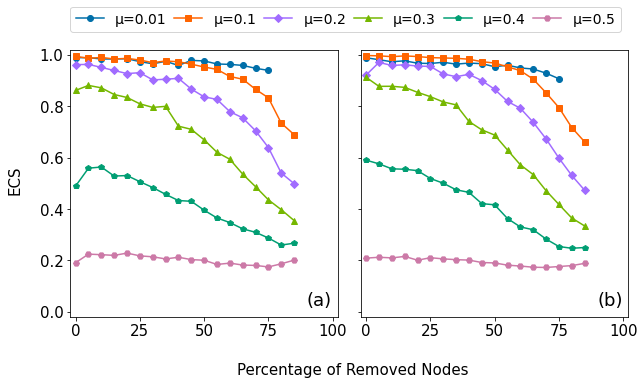

In [9]:
disturb_type = 1
N = 1000
method = 5
Plot_ECS_mnmf_high(disturb_type=disturb_type, N=N, method=method)